# Multiple Linear Regression

## Undrestanding P-Values
- https://www.mathbootcamps.com/what-is-a-p-value/

- https://www.wikihow.com/Calculate-P-Value

## Prepare Data and train the Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [47]:
categorical_features = ["State"]
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
one_hot = OneHotEncoder(drop= "first")
tranformer = ColumnTransformer([("onehot", one_hot, categorical_features)],
                              remainder="passthrough")

In [48]:
df_new = tranformer.fit_transform(df)

In [49]:
pd.DataFrame(df_new)

,0,1,2,3,4,5
0,0.0,1.0,165349.20,136897.80,471784.10,192261.83
1,0.0,0.0,162597.70,151377.59,443898.53,191792.06
2,1.0,0.0,153441.51,101145.55,407934.54,191050.39
3,0.0,1.0,144372.41,118671.85,383199.62,182901.99
4,1.0,0.0,142107.34,91391.77,366168.42,166187.94
5,0.0,1.0,131876.90,99814.71,362861.36,156991.12
6,0.0,0.0,134615.46,147198.87,127716.82,156122.51
7,1.0,0.0,130298.13,145530.06,323876.68,155752.60
8,0.0,1.0,120542.52,148718.95,311613.29,152211.77
9,0.0,0.0,123334.88,108679.17,304981.62,149759.96


In [52]:
x = df_new[:, :-1]
y = df_new[:,-1]
x.shape,y.shape

((50, 5), (50,))

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=.2)

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [55]:
model.fit(x_train, y_train)

LinearRegression()

In [57]:
model.score(x_test, y_test), model.score(x_train, y_train)

(0.9764007278613085, 0.9431552346720271)

In [58]:
predictions = model.predict(x_test)

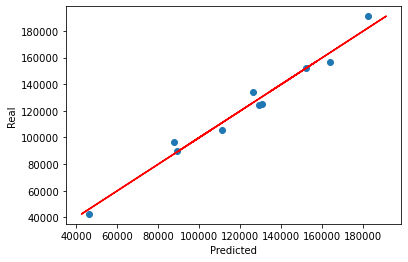

In [65]:
plt.scatter(predictions, y_test)
plt.plot(y_test, y_test, color="red")
plt.ylabel("Real")
plt.xlabel("Predicted")
plt.show()

# Backward Eliminations features

**we have to add x0 = 1**

In [73]:
import statsmodels.api as sm

In [70]:
x = np.append(arr = np.ones(shape=(50,1)), values = x, axis=1)

In [71]:
x.shape

(50, 6)

In [75]:
x_opt = x[:, [0, 1, 2, 3, 4, 5]]
regressor_ols = sm.OLS(endog = y, exog = x_opt).fit()

In [76]:
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           1.34e-27
Time:                        11:25:49   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
x_opt = x[:, [0, 1, 3, 4, 5]]
regressor_ols = sm.OLS(endog = y, exog = x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           8.49e-29
Time:                        11:27:52   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
x_opt = x[:, [0, 3, 4, 5]]
regressor_ols = sm.OLS(endog = y, exog = x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           4.53e-30
Time:                        11:28:23   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
x_opt = x[:, [0, 3, 5]]
regressor_ols = sm.OLS(endog = y, exog = x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           2.16e-31
Time:                        11:28:59   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
x_new = x_opt[:, [1, 2]]

In [83]:
model2 = LinearRegression()
model2.fit(x_new, y)
model2.score(x_new, y)

0.9504503015559763

## Auto Backward Elimination

In [90]:
import statsmodels.api as sm
def backward_eliminations(x, sl):
    num_vars = len(x[0])
    for i in range(0, num_vars):
        reg_ols = sm.OLS(y,x).fit()
        max_var = max(reg_ols.pvalues)
        if max_var > sl:
            for j in range(0, num_vars - i):
                if (reg_ols.pvalues[j]==max_var):
                    x = np.delete(x, j, 1)
    print(reg_ols.summary())
    return x

In [84]:
x[0]

array([1.000000e+00, 0.000000e+00, 1.000000e+00, 1.653492e+05,
       1.368978e+05, 4.717841e+05])

In [85]:
regressor_ols.pvalues

array([3.50406217e-22, 6.04043259e-24, 6.00303972e-02])

In [92]:
SL = 0.05
X_opt = x[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backward_eliminations(X_opt, SL)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           3.50e-32
Time:                        11:43:27   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.0

In [91]:
X_Modeled

array([[1.0000000e+00, 1.6534920e+05],
       [1.0000000e+00, 1.6259770e+05],
       [1.0000000e+00, 1.5344151e+05],
       [1.0000000e+00, 1.4437241e+05],
       [1.0000000e+00, 1.4210734e+05],
       [1.0000000e+00, 1.3187690e+05],
       [1.0000000e+00, 1.3461546e+05],
       [1.0000000e+00, 1.3029813e+05],
       [1.0000000e+00, 1.2054252e+05],
       [1.0000000e+00, 1.2333488e+05],
       [1.0000000e+00, 1.0191308e+05],
       [1.0000000e+00, 1.0067196e+05],
       [1.0000000e+00, 9.3863750e+04],
       [1.0000000e+00, 9.1992390e+04],
       [1.0000000e+00, 1.1994324e+05],
       [1.0000000e+00, 1.1452361e+05],
       [1.0000000e+00, 7.8013110e+04],
       [1.0000000e+00, 9.4657160e+04],
       [1.0000000e+00, 9.1749160e+04],
       [1.0000000e+00, 8.6419700e+04],
       [1.0000000e+00, 7.6253860e+04],
       [1.0000000e+00, 7.8389470e+04],
       [1.0000000e+00, 7.3994560e+04],
       [1.0000000e+00, 6.7532530e+04],
       [1.0000000e+00, 7.7044010e+04],
       [1.0000000e+00, 6.

In [94]:
import statsmodels.api as sm
def backwardElimination(x, SL):
    numVars = len(x[0])
    temp = np.zeros((50,6)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = x[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_opt, SL)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           2.16e-31
Time:                        11:45:40   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.0